# Week 5: Data Visualization Fundamentals
## Part 1: Matplotlib Architecture

**Date:** Wednesday, May 7, 2025  
**Duration:** 20 minutes  
**Course:** Python for Data Analysis

---

### Learning Objectives
By the end of this section, you will be able to:
1. Understand what Matplotlib is and why it's essential for data analysis
2. Explain the Figure and Axes hierarchy in Matplotlib
3. Distinguish between pyplot and object-oriented interfaces
4. Choose the appropriate interface for different visualization tasks

## 1. Introduction to Matplotlib (5 minutes)

### What is Matplotlib?

Matplotlib is Python's foundational plotting library, originally created by John Hunter in 2003 to emulate MATLAB's plotting capabilities. It's the grandfather of Python visualization libraries and serves as the foundation for many other plotting libraries like Seaborn and Pandas plotting.

### Why Use Matplotlib?

- **Complete Control**: Fine-grained control over every aspect of your plots
- **Flexibility**: Can create simple plots or complex multi-panel figures
- **Publication Quality**: Professional-grade output suitable for reports and papers
- **Foundation**: Understanding Matplotlib helps you work with other visualization libraries
- **Business Ready**: Industry standard for data visualization in Python

### Matplotlib vs Other Libraries

| Library | Best For | Learning Curve |
|---------|----------|----------------|
| Matplotlib | Complete control, custom plots | Steep |
| Seaborn | Statistical plots, quick analysis | Medium |
| Plotly | Interactive plots, dashboards | Medium |
| Pandas plotting | Quick data exploration | Easy |

> **SQL Analogy**: Think of Matplotlib like writing raw SQL - it gives you complete control but requires more syntax. Seaborn is like using a query builder - easier but less flexible.

In [1]:
# Standard import convention for Matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For better display in Jupyter notebooks
%matplotlib inline

# Check Matplotlib version
import matplotlib
print(f"Matplotlib version: {matplotlib.__version__}")

# Set default figure size for better visibility
plt.rcParams['figure.figsize'] = (10, 6)

Matplotlib version: 3.10.3


## 2. Understanding the Figure and Axes Hierarchy (10 minutes)

### The Matplotlib Hierarchy

Matplotlib follows a hierarchical structure that mirrors how we think about creating plots:

```
Figure (Canvas)
├── Axes (Plot Area 1)
│   ├── Artist Objects (Lines, Text, etc.)
│   ├── X-Axis
│   └── Y-Axis
├── Axes (Plot Area 2)
│   └── ...
└── Figure-level elements (Suptitle, etc.)
```

### Key Components:

1. **Figure**: The top-level container (like a canvas or paper)
2. **Axes**: The plotting area where data is drawn (like a graph within the canvas)
3. **Artist**: Everything you see on the plot (lines, text, markers, etc.)

> **Important**: "Axes" is plural! One plot area is called "Axes", not "Axis". The x and y lines are called "Axis" (singular).

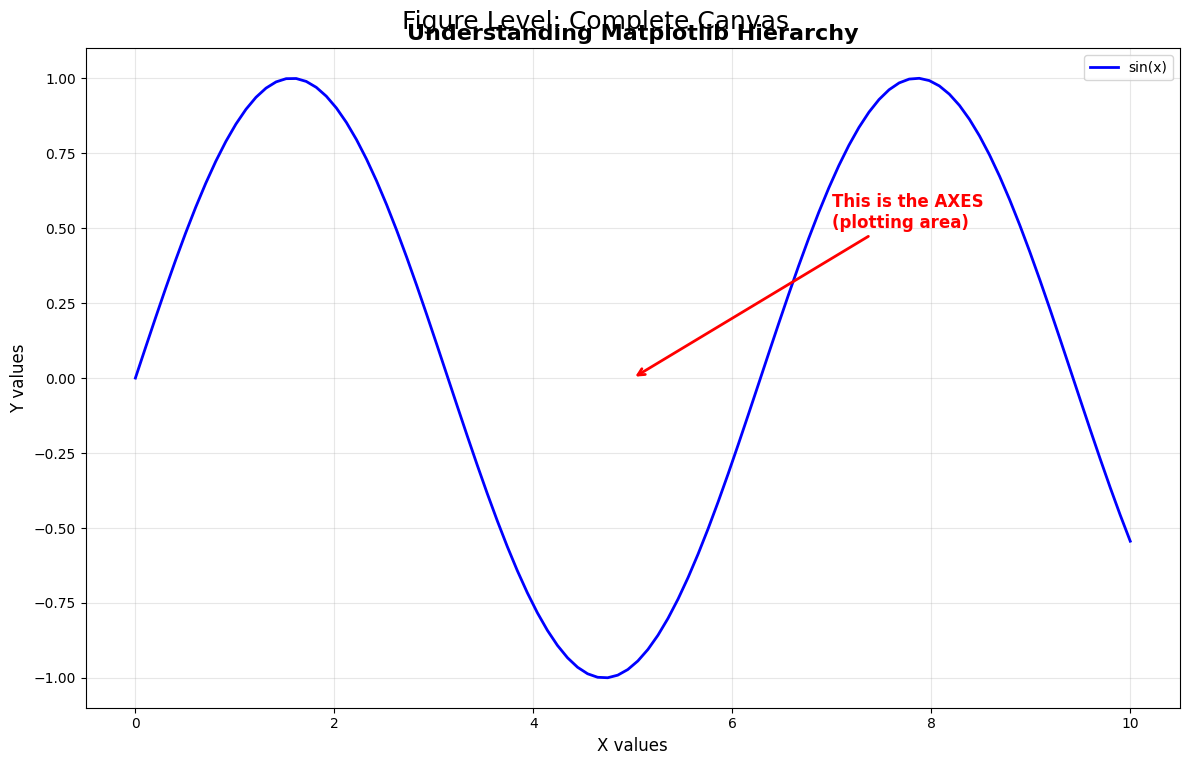

Figure object: <class 'matplotlib.figure.Figure'>
Axes object: <class 'matplotlib.axes._axes.Axes'>
Figure contains 1 axes


In [2]:
# Demonstration of Figure and Axes relationship

# Create a figure with one axes
fig, ax = plt.subplots(figsize=(12, 8))

# Add some sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plot on the axes
ax.plot(x, y, 'b-', linewidth=2, label='sin(x)')

# Customize the axes
ax.set_title('Understanding Matplotlib Hierarchy', fontsize=16, fontweight='bold')
ax.set_xlabel('X values', fontsize=12)
ax.set_ylabel('Y values', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend()

# Add a figure-level title (suptitle)
fig.suptitle('Figure Level: Complete Canvas', fontsize=18, y=0.95)

# Add text annotations to explain components
ax.annotate('This is the AXES\n(plotting area)', 
            xy=(5, 0), xytext=(7, 0.5),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Figure object: {type(fig)}")
print(f"Axes object: {type(ax)}")
print(f"Figure contains {len(fig.axes)} axes")

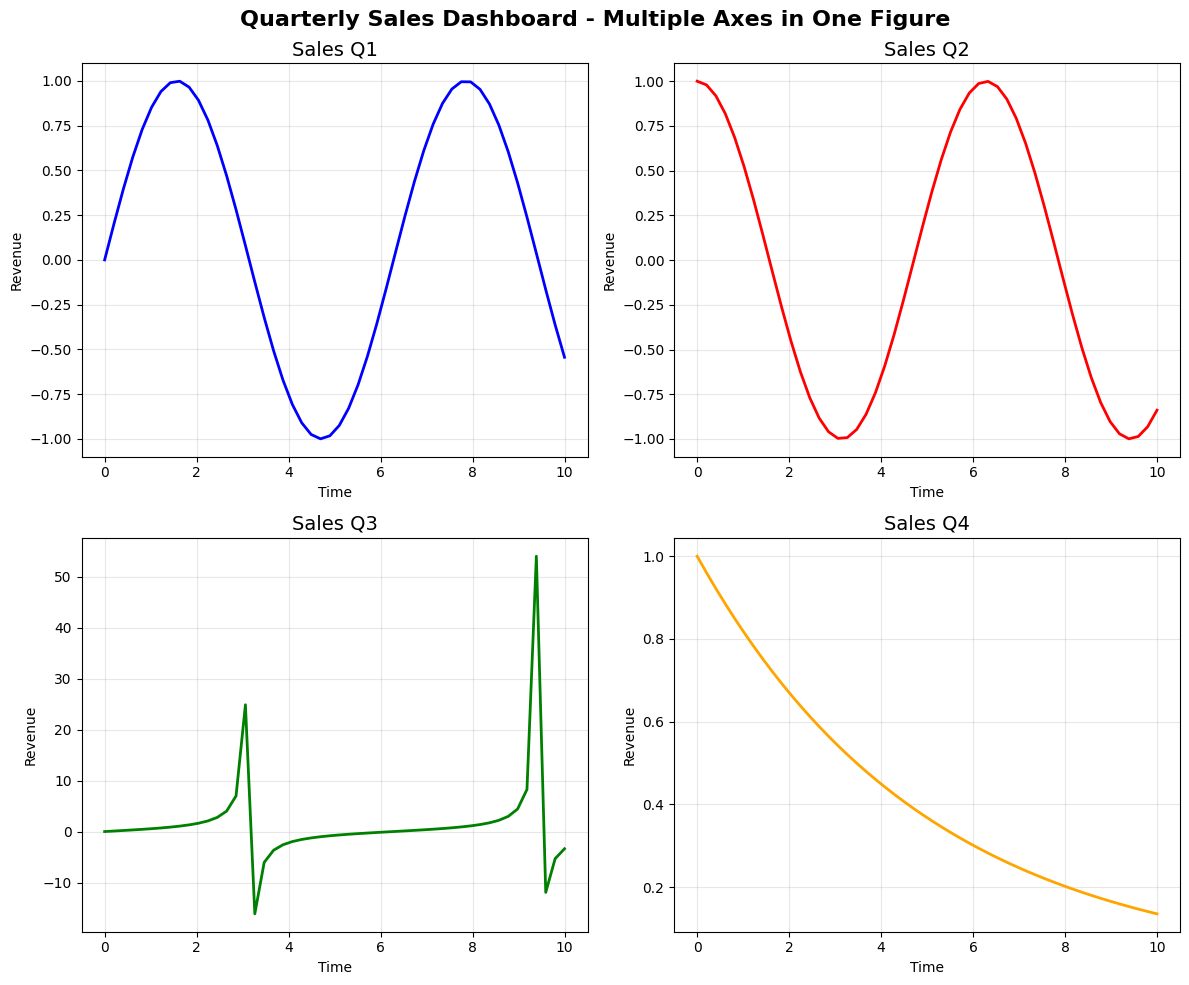

This figure contains 4 axes objects
Axes array shape: (2, 2)


In [3]:
# Demonstration of multiple axes in one figure
# This is like having multiple charts in one Excel sheet

# Create figure with 2x2 grid of axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Sample data for demonstration
x = np.linspace(0, 10, 50)
data_sets = [
    ('Sales Q1', np.sin(x), 'blue'),
    ('Sales Q2', np.cos(x), 'red'),
    ('Sales Q3', np.tan(x/2), 'green'),
    ('Sales Q4', np.exp(-x/5), 'orange')
]

# Plot on each axes
for i, (title, y_data, color) in enumerate(data_sets):
    row = i // 2
    col = i % 2
    
    axes[row, col].plot(x, y_data, color=color, linewidth=2)
    axes[row, col].set_title(title, fontsize=14)
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].set_xlabel('Time')
    axes[row, col].set_ylabel('Revenue')

# Figure-level title
fig.suptitle('Quarterly Sales Dashboard - Multiple Axes in One Figure', 
             fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"This figure contains {len(fig.axes)} axes objects")
print(f"Axes array shape: {axes.shape}")

### Business Analogy: Matplotlib Hierarchy

Think of creating visualizations like preparing a business report:

- **Figure** = The entire page/document
- **Axes** = Individual charts/graphs on the page
- **Artists** = The actual content (bars, lines, text) in each chart

Just like you might have multiple charts on one page of a business report, you can have multiple Axes in one Figure.

## 3. Two Interfaces: Pyplot vs Object-Oriented (5 minutes)

Matplotlib provides two ways to create plots:

### 1. Pyplot Interface (MATLAB-style)
- **Pros**: Simple, quick for basic plots
- **Cons**: Less control, harder to customize complex plots
- **Best for**: Quick data exploration, simple plots

### 2. Object-Oriented Interface
- **Pros**: Full control, explicit, better for complex plots
- **Cons**: More verbose, steeper learning curve
- **Best for**: Professional visualizations, complex layouts, production code

=== PYPLOT INTERFACE ===


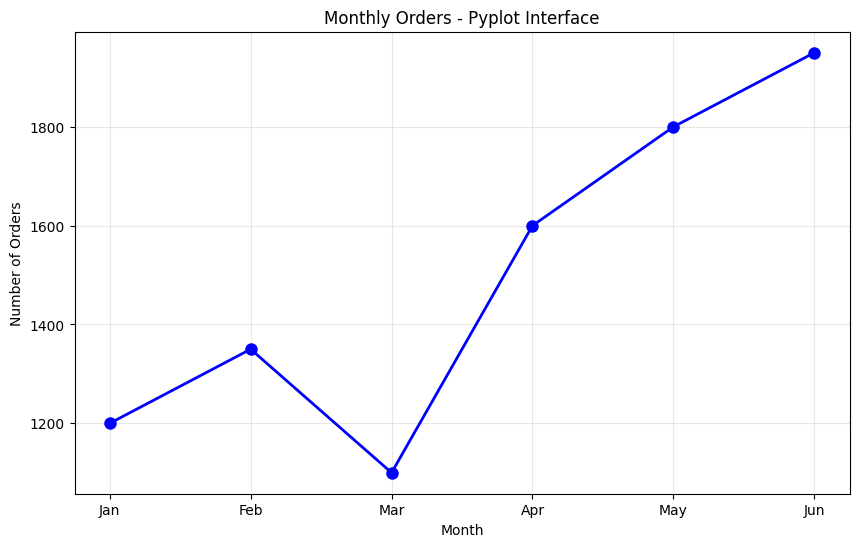

Pyplot interface: Simple but less explicit control


In [4]:
# PYPLOT INTERFACE (MATLAB-style)
# Quick and simple - works with "current" figure and axes

print("=== PYPLOT INTERFACE ===")

# Create sample e-commerce data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
orders = [1200, 1350, 1100, 1600, 1800, 1950]

# Using pyplot - notice we don't explicitly create figure/axes
plt.figure(figsize=(10, 6))
plt.plot(months, orders, 'bo-', linewidth=2, markersize=8)
plt.title('Monthly Orders - Pyplot Interface')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True, alpha=0.3)
plt.show()

print("Pyplot interface: Simple but less explicit control")

=== OBJECT-ORIENTED INTERFACE ===


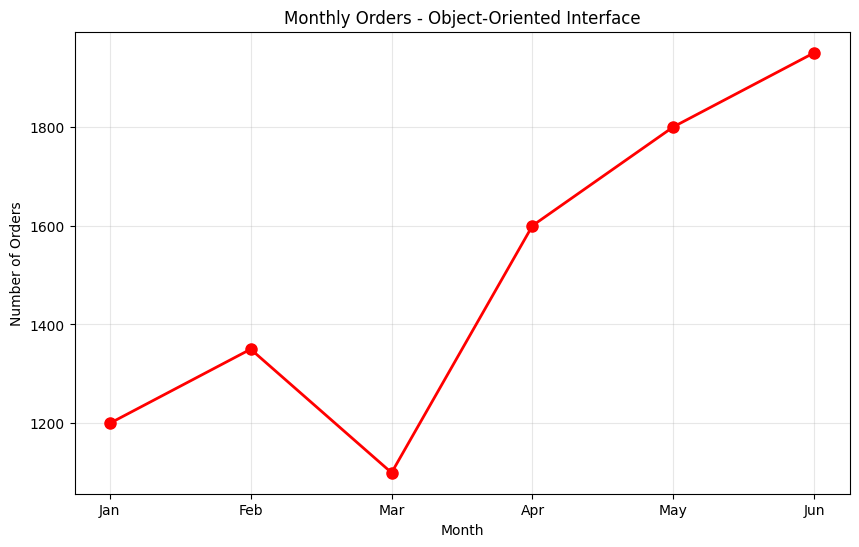

Object-oriented interface: More explicit, better control
We have explicit references to: <class 'matplotlib.figure.Figure'> and <class 'matplotlib.axes._axes.Axes'>


In [5]:
# OBJECT-ORIENTED INTERFACE
# Explicit control over figure and axes objects

print("=== OBJECT-ORIENTED INTERFACE ===")

# Explicitly create figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot using the axes object
ax.plot(months, orders, 'ro-', linewidth=2, markersize=8)
ax.set_title('Monthly Orders - Object-Oriented Interface')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Orders')
ax.grid(True, alpha=0.3)

plt.show()

print("Object-oriented interface: More explicit, better control")
print(f"We have explicit references to: {type(fig)} and {type(ax)}")

=== COMPARISON: COMPLEX VISUALIZATION ===
Creating a dashboard with multiple plots...


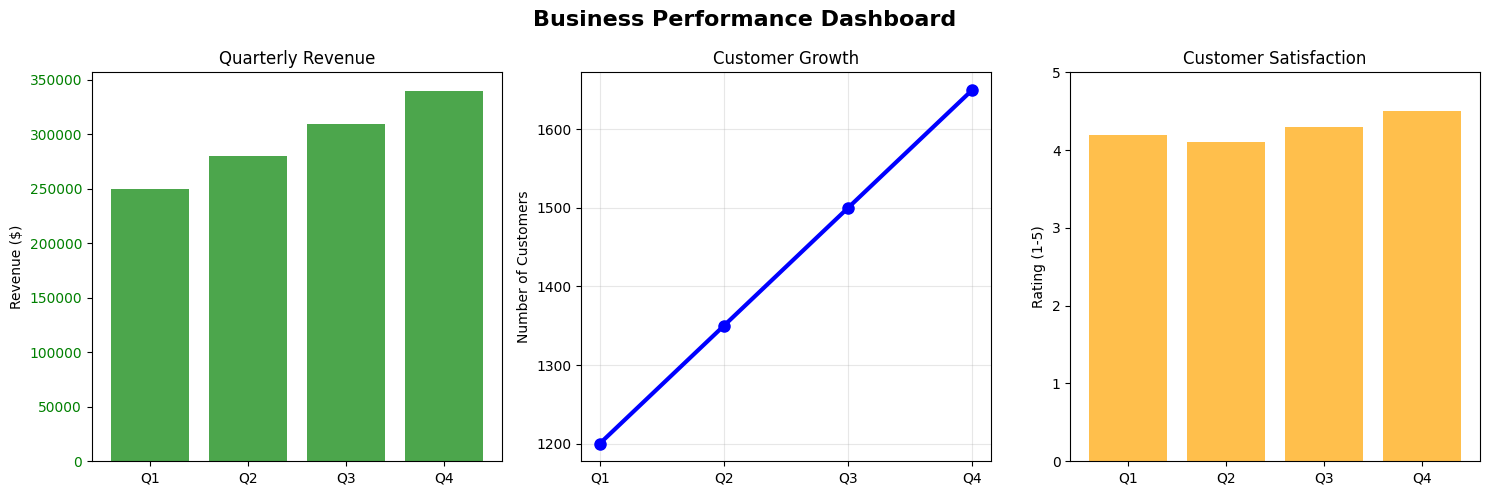


✅ Object-oriented interface excels at:
   • Multiple subplots with different customizations
   • Complex layouts and arrangements
   • Professional, production-ready visualizations
   • When you need to modify plots after creation


In [6]:
# WHEN TO USE WHICH INTERFACE?

print("=== COMPARISON: COMPLEX VISUALIZATION ===")
print("Creating a dashboard with multiple plots...")

# Sample business data
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
revenue = [250000, 280000, 310000, 340000]
customers = [1200, 1350, 1500, 1650]
satisfaction = [4.2, 4.1, 4.3, 4.5]

# Object-oriented approach is better for complex layouts
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Revenue plot
ax1.bar(quarters, revenue, color='green', alpha=0.7)
ax1.set_title('Quarterly Revenue')
ax1.set_ylabel('Revenue ($)')
ax1.tick_params(axis='y', labelcolor='green')

# Customer count plot
ax2.plot(quarters, customers, 'bo-', linewidth=3, markersize=8)
ax2.set_title('Customer Growth')
ax2.set_ylabel('Number of Customers')
ax2.grid(True, alpha=0.3)

# Satisfaction plot
ax3.bar(quarters, satisfaction, color='orange', alpha=0.7)
ax3.set_title('Customer Satisfaction')
ax3.set_ylabel('Rating (1-5)')
ax3.set_ylim(0, 5)

# Figure-level title
fig.suptitle('Business Performance Dashboard', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Object-oriented interface excels at:")
print("   • Multiple subplots with different customizations")
print("   • Complex layouts and arrangements")
print("   • Professional, production-ready visualizations")
print("   • When you need to modify plots after creation")

## Best Practices and Recommendations

### When to Use Each Interface:

#### Use **Pyplot Interface** for:
- Quick data exploration
- Simple, single plots
- Interactive analysis in notebooks
- Learning and experimenting

#### Use **Object-Oriented Interface** for:
- Production code and business reports
- Multiple subplots or complex layouts
- When you need precise control
- Reusable plotting functions
- **This course will primarily use OO interface**

### SQL to Matplotlib Mindset:

```sql
-- In SQL, you build queries step by step:
SELECT customer_state, COUNT(*) as order_count
FROM orders 
GROUP BY customer_state
ORDER BY order_count DESC;
```

```python
# In Matplotlib OO, you build plots step by step:
fig, ax = plt.subplots()                    # Create canvas
ax.bar(states, counts)                      # Add data
ax.set_title('Orders by State')             # Add title
ax.set_xlabel('State')                      # Add labels
```

=== PRACTICAL BUSINESS EXAMPLE ===


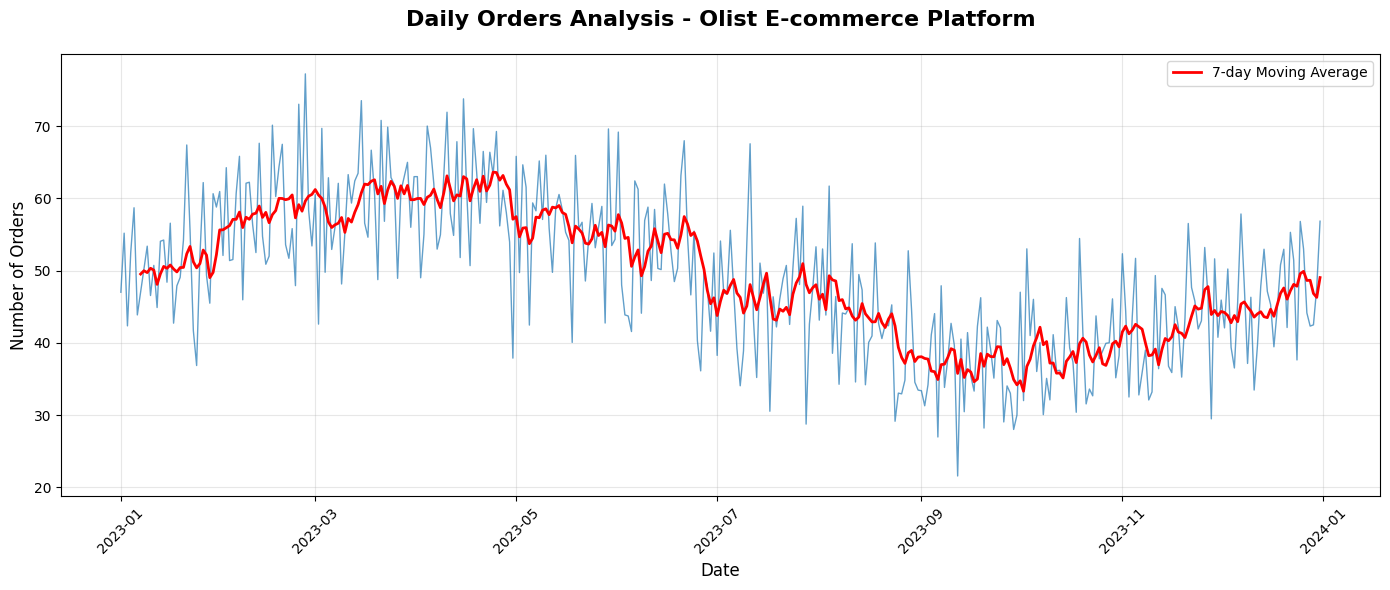

This type of analysis helps businesses:
• Identify seasonal trends
• Plan inventory and staffing
• Monitor business performance
• Make data-driven decisions


In [7]:
# PRACTICAL EXAMPLE: E-commerce Data Visualization
# This simulates what you'll do with real Olist data

print("=== PRACTICAL BUSINESS EXAMPLE ===")

# Simulate Olist-like data
np.random.seed(42)
dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
daily_orders = np.random.poisson(lam=50, size=len(dates)) + np.sin(np.arange(len(dates)) * 2 * np.pi / 365) * 10

# Create professional visualization using OO interface
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the data
ax.plot(dates, daily_orders, color='#1f77b4', linewidth=1, alpha=0.7)

# Add 7-day moving average
moving_avg = pd.Series(daily_orders).rolling(window=7).mean()
ax.plot(dates, moving_avg, color='red', linewidth=2, label='7-day Moving Average')

# Customize the plot
ax.set_title('Daily Orders Analysis - Olist E-commerce Platform', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend()

# Format dates on x-axis
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("This type of analysis helps businesses:")
print("• Identify seasonal trends")
print("• Plan inventory and staffing")
print("• Monitor business performance")
print("• Make data-driven decisions")

## Key Takeaways

### 🎯 Architecture Understanding:
1. **Figure** = Canvas (entire visualization space)
2. **Axes** = Plot area (where your data lives)
3. **Artists** = Visual elements (lines, bars, text)

### 🎯 Interface Choice:
- **Pyplot**: Quick and simple for exploration
- **Object-Oriented**: Professional and precise for business use

### 🎯 Business Application:
- Matplotlib gives you complete control over your visualizations
- Essential for creating professional business reports
- Foundation for all other Python visualization libraries

---

## Next Up: Creating Basic Plots

In the next section, we'll learn how to create the four fundamental plot types:
- Line plots (trends over time)
- Scatter plots (relationships between variables)
- Bar charts (categorical comparisons)
- Histograms (distribution analysis)

**Practice Question**: Before we move on, can you explain the difference between a Figure and an Axes to a colleague who's new to data visualization?